<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook 11</p></tp>
            <tp><p style="font-size:150%;text-align:center">Redes de decisión</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---


# Objetivo

En este notebook veremos cómo tomar decisiones racionales, entendidas estas como aquellas que maximizan la utilidad esperada del agente. Veremos que podemos echar mano de las redes bayesianas, pero necesitamos también un concepto nuevo: el de las funciones de utilidad.

Adaptado de Russell & Norvig (2021), cap. 16.

# Secciones

* [Utilidad esperada y toma de decisiones.](#MEU)
* [Implementación de redes de decisión](#implementacion)
* [Escenarios más complejos.](#dependencia)
* [Agente basado en la utilidad.](#utility-based)


# Utilidad esperada y toma de decisiones   <a class="anchor" id="MEU">

Hemos visto que uno de los objetivos de la Inteligencia Artificial es producir agentes cuyo comportamiento sea inteligente. Este se ha entendido tradicionalmente como la realización de acciones racionales, las cuales  buscan obtener fines de la manera más eficiente posible. Imagine que un agente debe tomar una decisión de entre un conjunto de acciones $\{a_1,\ldots, a_0\}$. Cada acción $a_i$ produce un estado $S_i$. Si el agente fuera indiferente frente a los estados $S_i$s, entonces cualquier acción estaría bien para él y el problema de decisión sería trivial. No obstante, un agente racional tiene un objetivo que quiere cumplir. Esto divide los estados $S_i$s en aquellos que cumplen el objetivo y aquellos que no. Es más, muchas veces es posible asignar una preferencia entre dos estados, $S_i$ y $S_j$, de tal manera que el agente prefiere a $S_i$ sobre $S_j$ si el primero lo acerca más a su objetivo que el segundo. Así pues, un agente racional, frente a su problema de decisión, realizará la acción $a$ que con mayor probabilidad lo lleve al estado que esté más cerca del objetivo.
    
Es posible formalizar esta idea echando mano de tres conceptos. El primero es el de una *lotería*, el cual no es otra cosa que un conjunto de estados, cada uno con una probabilidad asignada: $\{S_1,p_1; S_2,p_2; \ldots; S_n,p_n\}$. El segundo es el de una *función de utilidad* $U$, la cual le asigna un valor numérico a cada estado $S_i$ de tal manera que $U(S_i)>U(S_j)$ sii el agente prefiere el estado $S_i$ sobre el estado $S_j$. Estos dos conceptos nos permiten definir la *Utilidad Esperada* de la siguiente manera:
    
$$U\!E=\sum_{i=1}^n U(S_i)p_i$$
    
El tercer concepto es que el conjunto de estados $\{S_1,p_1; S_2,p_2; \ldots; S_n,p_n\}$ depende de una acción $a$. Es decir, se representan situaciones en las cuales el resultado de una acción $a$ es incierta. La incertidumbre resulta porque la acción no determina completamente el resultado cuando, por ejemplo, este depende de otros agentes, o de factores que no son completamente conocidos y/o controlables por el agente. Esto es, una acción $a$ da como resultado una acción $S_1$ con probabilidad $P(S_1|a)$, o un estado $S_2$ con probabilidad $P(S_2|a)$, $\ldots$, o un estado $S_n$ con probabilidad $P(S_n|a)$. Así pues, tenemos el concepto de *Utilidad Esperada* de una acción $a$:
    
$$U\!E(a)=\sum_{i=1}^n U(S_i)P(S_i|a)\qquad\qquad (1)$$

Un agente racional, frente a un problema de decisión, decidirá ejecutar la acción que le permita **maximizar su utilidad esperada**:
    
$$\mbox{Acción}=\mbox{argmax}_a\, U\!E(a)=\mbox{argmax}_a\sum_{i=1}^n U(S_i)P(S_i|a)\qquad\qquad (2)$$

## Ejemplo con el mundo del Wumpus

Para ilustrar esta propuesta de cómo un agente toma una decisión racional, volvamos a nuestro bien conocido mundo del Wumpus. Suponga que el agente, después de partir de la celda $(0,0)$, se encuentra en la casilla $(1,0)$. Analicemos dos situaciones posibles, como lo muestran las siguientes figuras:

<table>
  <tr>
    <td><img src="./imagenes/ParaRedesDecisionB.png" width="300"></td>
    <td><img src="./imagenes/ParaRedesDecisionA.png" width="300"></td>
  </tr>
</table>

Las dos situaciones corresponden a si el agente siente una brisa (izquierda) o no (derecha). ¿Cuál es la acción racional en cada caso? Observe que el agente tiene tres acciones posibles:

1. Regresarse a $(0,0)$
2. Seguir a $(2,0)$
3. Subir a $(1,1)$.


Hagamos el ejercicio de asignar utilidades a los estados resultantes de estas acciones. Estos estados son, claramente, la casilla a la que llega el agente después de realizar la acción. Vamos a proceder a determinar la utilidad con base en la consideración de si en la casilla correspondiente hay o no un pozo y de si está o no el oro. Por ejemplo:

$$
U(\mbox{casilla}(x,y)) = \begin{cases}
1, & \mbox{si }Oro(x,y) \wedge \neg Pozo(x,y)\\
0, & \mbox{si }\neg Oro(x,y) \wedge \neg Pozo(x,y)\\
-1, & \mbox{ si }Pozo(x,y)
\end{cases}
$$

Dado que el agente desconoce la localización de los pozos y del oro, no es posible deducir cuál es la utilidad de una casilla. No obstante, como vimos en el notebook pasado, sí podemos cuantificar la incertidumbre y revisar nuestras predicciones con base en la información que vamos incorporando. Podemos entonces ponderar la utilidad de cada estado posible con su probabilidad de ocurrencia, mediante la fórmula de la utilidad esperada (1). En este caso tendríamos:

\begin{align*}
U\!E(\mbox{casilla}(x,y))&=U(Oro(x,y), \neg Pozo(x,y))P(Oro(x,y), \neg Pozo(x,y)|evidencia)\\
& \quad + U(\neg Oro(x,y), \neg Pozo(x,y))P(\neg Oro(x,y), \neg Pozo(x,y)|evidencia)\\
& \quad + U(Pozo(x,y))P(Pozo(x,y)|evidencia)\\
&= 1\times P(Oro(x,y), \neg Pozo(x,y)|evidencia)\\
& \quad + 0 \times P(\neg Oro(x,y), \neg Pozo(x,y)|evidencia)\\
& \quad - 1 \times P(Pozo(x,y)|evidencia)
\end{align*}

La acción racional queda determinada por la fórmula (2) de maximización de la utilidad esperada, la cual requiere que realicemos el cálculo anterior para todas las acciones posibles, de tal manera que escogeremos la acción que tenga asociada la mayor utilidad esperada. 

Ahora bien, observe que llevar a cabo estos cálculos puede hacerse con o sin evidencia. Observe también que la evidencia disponible es lo que separa la situación de la figura de arriba a la izquierda (en donde la evidencia es que hay brisa en $(1,0)$) de la situación de la derecha (en donde no hay brisa). Podríamos tratar de hacer los cálculos a mano, pero es más divertido programar el computador para que los haga por nosotros.

Vamos a ver a continuación cómo usar el objeto `InfluenceDiagram` de la librería `pyagrum` para implementar el cálculo de la toma racional de decisiones. Comenzaremos con una situación en que no consideramos el oro, que es más sencilla, para luego incluir esta complicación en nuestros cálculos.

# Implementación de redes de decisión <a class="anchor" id="implementacion">
    
Una red de decisión, también conocida como un diagrama de influencia, es una red que incorpora una red bayesiana, un nodo de acción y otro de utilidad (es posible tener más de un nodo de acción y más de un nodo de utilidad, pero en nuestros ejemplos solo tendremos uno de cada uno). Mediante ella es posible calcular las utilidades esperadas de las acciones de acuerdo a las probabilidades establecidas en la red bayesiana y la evidencia disponible.
    
En la red de decisión hay tres tipos de nodos:
    
* Nodos de probabilidad: son los nodos de la red bayesiana.
* Nodo de decisión: es el nodo que representa las acciones posibles.
* Nodo de utilidad: está conectado a los demás nodos de tal manera que representa la utilidad esperada de cada acción del nodo de decisión, de acuerdo a las probabilidades de los nodos de probabilidad.
 
Para comprender mejor estos conceptos, creemos una red de decisión simple para el ejemplo del mundo del Wumpus que discutimos anteriormente. Vamos a comenzar con un caso sencillo, en el cual no tomamos en cuenta si hay o no oro en una casilla. De esta manera, nuestra función de utilidad es la siguiente:
    
$$
U(\mbox{casilla}(x,y)) = \begin{cases}
1, & \mbox{si }\neg Pozo(x,y)\\
-1, & \mbox{ si }Pozo(x,y)
\end{cases}
$$
    
Lo primero que debemos hacer es cargar las librerías que necesitamos:

In [1]:
import numpy as np
from itertools import product
from wumpus import *
from busqueda import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gum.config['notebook','potential_visible_digits']=2
import cairosvg

A continuación, creamos una instancia de la clase `InfluenceDiagram`:

In [3]:
model = gum.InfluenceDiagram()

Ahora creamos los nodos de probabilidad y sus conexiones. Observe que esto es muy similar a la manera como creamos una red bayesiana en el notebook pasado:

In [4]:
# Creando los nodos
pozo0 = gum.LabelizedVariable('Pozo(0,0)','Pozo(0,0)',2)
model.addChanceNode(pozo0)
pozo1 = gum.LabelizedVariable('Pozo(1,1)','Pozo(1,1)',2)
model.addChanceNode(pozo1)
pozo2 = gum.LabelizedVariable('Pozo(2,0)','Pozo(2,0)',2)
model.addChanceNode(pozo2)
brisa = gum.LabelizedVariable('Brisa(1,0)','Brisa(1,0)',2)
model.addChanceNode(brisa)

# Creando las aristas de la red bayesiana
model.addArc('Pozo(0,0)', 'Brisa(1,0)')
model.addArc('Pozo(1,1)', 'Brisa(1,0)')
model.addArc('Pozo(2,0)', 'Brisa(1,0)')

# Creando las probabilidades
model.cpt('Pozo(0,0)')[:]=[0.8,0.2]
model.cpt('Pozo(1,1)')[:]=[0.8,0.2]
model.cpt('Pozo(2,0)')[:]=[0.8,0.2]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 1, 'Pozo(1,1)': 1, 'Pozo(2,0)': 1}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 1, 'Pozo(1,1)': 1, 'Pozo(2,0)': 0}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 1, 'Pozo(1,1)': 0, 'Pozo(2,0)': 1}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 1, 'Pozo(1,1)': 0, 'Pozo(2,0)': 0}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 0, 'Pozo(1,1)': 1, 'Pozo(2,0)': 1}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 0, 'Pozo(1,1)': 1, 'Pozo(2,0)': 0}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 0, 'Pozo(1,1)': 0, 'Pozo(2,0)': 1}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 0, 'Pozo(1,1)': 0, 'Pozo(2,0)': 0}] = [1, 0]

model

(pyAgrum.InfluenceDiagram<double>@0x7f9a0113e200) Influence Diagram{
  chance: 4,
  utility: 0,
  decision: 0,
  arcs: 3,
  domainSize: 16
}

Luego creamos un nodo de decisión. Este nodo es la variable que representa cuál es la acción a tomar. En nuestro ejemplo, definir una acción es equivalente a considerar a cuál casilla se va a mover el agente.

In [5]:
casilla = gum.LabelizedVariable('Casilla','Casilla a moverse',3)
casilla.changeLabel(0,'(0,0)')
casilla.changeLabel(1,'(1,1)')
casilla.changeLabel(2,'(2,0)')
model.addDecisionNode(casilla)

4

Y ahora creamos el nodo de utilidad. Las conexiones a este nodo deben ser todas las variables sobre las cuales depende la utilidad del estado obtenido por la acción realizada. En nuestro caso, consideramos los pozos y la casilla a la que se mueve el agente:

In [6]:
ut_casilla = gum.LabelizedVariable('UtilityOfCasilla','Valor casilla',1)
model.addUtilityNode(ut_casilla)

model.addArc('Pozo(0,0)', 'UtilityOfCasilla')
model.addArc('Pozo(1,1)', 'UtilityOfCasilla')
model.addArc('Pozo(2,0)', 'UtilityOfCasilla')
model.addArc('Casilla', 'UtilityOfCasilla')

model

(pyAgrum.InfluenceDiagram<double>@0x7f9a0113e200) Influence Diagram{
  chance: 4,
  utility: 1,
  decision: 1,
  arcs: 7,
  domainSize: 48
}

Nos falta incluir el cálculo de la utilidad de cada acción (que en nuestro caso es una casilla). Definamos primero la función de utilidad de una casilla:

In [7]:
def utilidad(d):
    '''
    Función que determina la utilidad de una casilla.
    Input: d, que es un diccionario de la forma:
        {
            'Pozo(0,0)':valor1,
            'Pozo(1,1)':valor2,
            'Pozo(2,0)':valor3,
            'Casilla':'(x,y)'
        }
    '''
    
    C = d['Casilla']
    if (d['Pozo'+C] == 0):
        return 1
    else:
        return -1

Comprobamos el funcionamiento de la función con un ejemplo:

In [8]:
d = {'Pozo(0,0)':1,'Pozo(1,1)':0,'Pozo(2,0)':1,'Casilla':'(0,0)'}
utilidad(d)

-1

Ahora debemos asignar la utilidad al nodo `UtilityOfCasilla` de acuerdo a todas las posibles combinaciones de valores para las variables que conectan a ella. Pero para hacer esto de manera escalable, creemos automáticamente todos los diccionarios con todas las combinaciones de valores posibles.

In [9]:
variables = ['Pozo(0,0)','Pozo(1,1)','Pozo(2,0)','Casilla']
opciones = product([0,1], [0,1], [0,1], ['(0,0)','(1,1)','(2,0)'])
dicts_variables = [{variables[i]:op[i] for i in range(len(variables))} for op in opciones]
dicts_variables

[{'Pozo(0,0)': 0, 'Pozo(1,1)': 0, 'Pozo(2,0)': 0, 'Casilla': '(0,0)'},
 {'Pozo(0,0)': 0, 'Pozo(1,1)': 0, 'Pozo(2,0)': 0, 'Casilla': '(1,1)'},
 {'Pozo(0,0)': 0, 'Pozo(1,1)': 0, 'Pozo(2,0)': 0, 'Casilla': '(2,0)'},
 {'Pozo(0,0)': 0, 'Pozo(1,1)': 0, 'Pozo(2,0)': 1, 'Casilla': '(0,0)'},
 {'Pozo(0,0)': 0, 'Pozo(1,1)': 0, 'Pozo(2,0)': 1, 'Casilla': '(1,1)'},
 {'Pozo(0,0)': 0, 'Pozo(1,1)': 0, 'Pozo(2,0)': 1, 'Casilla': '(2,0)'},
 {'Pozo(0,0)': 0, 'Pozo(1,1)': 1, 'Pozo(2,0)': 0, 'Casilla': '(0,0)'},
 {'Pozo(0,0)': 0, 'Pozo(1,1)': 1, 'Pozo(2,0)': 0, 'Casilla': '(1,1)'},
 {'Pozo(0,0)': 0, 'Pozo(1,1)': 1, 'Pozo(2,0)': 0, 'Casilla': '(2,0)'},
 {'Pozo(0,0)': 0, 'Pozo(1,1)': 1, 'Pozo(2,0)': 1, 'Casilla': '(0,0)'},
 {'Pozo(0,0)': 0, 'Pozo(1,1)': 1, 'Pozo(2,0)': 1, 'Casilla': '(1,1)'},
 {'Pozo(0,0)': 0, 'Pozo(1,1)': 1, 'Pozo(2,0)': 1, 'Casilla': '(2,0)'},
 {'Pozo(0,0)': 1, 'Pozo(1,1)': 0, 'Pozo(2,0)': 0, 'Casilla': '(0,0)'},
 {'Pozo(0,0)': 1, 'Pozo(1,1)': 0, 'Pozo(2,0)': 0, 'Casilla': '(1,1)'},
 {'Poz

Asignamos la utilidad del nodo `UtilityOfCasilla`:

In [10]:
for d in dicts_variables:
    model.utility('UtilityOfCasilla')[d]=utilidad(d)

Y finalmente comprobamos que el cálculo de la utilidad sea el esperado:

In [11]:
ie = gum.InfluenceDiagramInference(model)
ie.makeInference()
ie.posteriorUtility("UtilityOfCasilla")

/Users/jdrojasga/miniconda3/lib/python3.9/site-packages/pyAgrum/deprecated.py:19: UserWarning: 
  ** pyAgrum.InfluenceDiagramInference is deprecated in pyAgrum>0.18.2.
  ** A pyAgrum.ShaferShenoyLIMIDInference has been created.
  
  warnings.warn("""


(pyAgrum.Potential<double>@0x7f9a05059de8) 
                           ||  Utility|
Pozo(0|Pozo(1|Pozo(2|Casill||0        |
------|------|------|------||---------|
0     |0     |0     |(0,0) || 1.0000  |
1     |0     |0     |(0,0) || -1.0000 |
0     |1     |0     |(0,0) || 1.0000  |
1     |1     |0     |(0,0) || -1.0000 |
0     |0     |1     |(0,0) || 1.0000  |
1     |0     |1     |(0,0) || -1.0000 |
[...12 more line(s) ...]
0     |1     |0     |(2,0) || 1.0000  |
1     |1     |0     |(2,0) || 1.0000  |
0     |0     |1     |(2,0) || -1.0000 |
1     |0     |1     |(2,0) || -1.0000 |
0     |1     |1     |(2,0) || -1.0000 |
1     |1     |1     |(2,0) || -1.0000 |

Ya podemos visualizar la red de decisión:

Situación I: Análisis del escenario sin información:


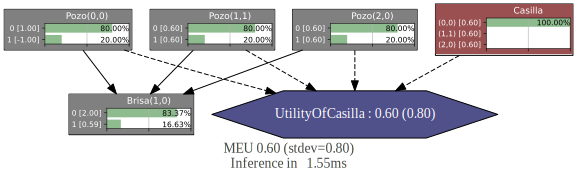

In [12]:
print("Situación I: Análisis del escenario sin información:")
gnb.showInference(model,evs={})

Observe que el nodo de decisión `Casilla` nos muestra la utilidad esperada de cada opción. En este caso, todas tienen un valor de 0.6. La mejor opción también está señalada (que en este caso es la primera que aparece).

Ahora bien, debemos incluir la evidencia que tengamos a nuestra disposición. Ya sabemos que no hay pozo en la casilla $(0,0)$ porque las reglas del mundo lo prohiben. También, dependiendo del escenario que consideremos (izquierda -- con brisa -- o derecha -- sin brisa -- ), podemos ver qué acción tiene mayor utilidad esperada. Tómese unos minutos para entender el análisis siguiente de las dos situaciones y que nos permite visualizar la red de decisión:

Situación II: Análisis del escenario con brisa:


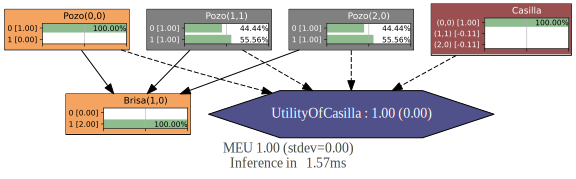

Situación III: Análisis del escenario sin brisa:


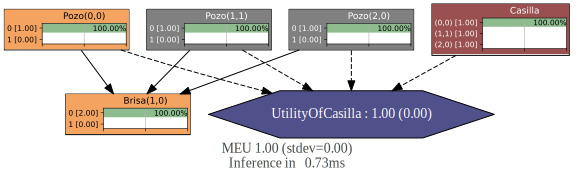

In [13]:
print("Situación II: Análisis del escenario con brisa:")
gnb.showInference(model,evs={'Pozo(0,0)':0,'Brisa(1,0)':1})
print("Situación III: Análisis del escenario sin brisa:")
gnb.showInference(model,evs={'Pozo(0,0)':0,'Brisa(1,0)':0})

Tanto en la situación I como en la III, tenemos varias acciones con la misma utilidad esperada: un empate entre máximos. El método `optimalDecision` que viene con la librería siempre escogerá la primera acción en este empate:

In [14]:
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence({'Pozo(0,0)':0,'Brisa(1,0)':0})
ie.makeInference()
print("Utilidades esperadas de las acciones:")
print(ie.posteriorUtility("Casilla"))
print("Decisión de la librería:")
print(ie.optimalDecision("Casilla"))

Utilidades esperadas de las acciones:

  Casilla                    |
(0,0)    |(1,1)    |(2,0)    |
---------|---------|---------|
 1.0000  | 1.0000  | 1.0000  |

Decisión de la librería:

  Casilla                    |
(0,0)    |(1,1)    |(2,0)    |
---------|---------|---------|
 1.0000  | 0.0000  | 0.0000  |



Podemos crear una sencilla función auxiliar para escoger una acción aleatoria entre aquellas que tienen máxima utilidad esperada:

In [2]:
def maximo_aleatorio(valores):
    indices = [i for i, x in enumerate(valores) if x == max(valores)]
    return np.random.choice(indices)

In [16]:
casillas = ['(0,0)', '(1,1)', '(2,0)']
valores = ie.posteriorUtility("Casilla").tolist()
accion = maximo_aleatorio(valores)
print("Primera iteración:", casillas[accion])
accion = maximo_aleatorio(valores)
print("Segunda iteración:", casillas[accion])
accion = maximo_aleatorio(valores)
print("Tercera iteración:", casillas[accion])

Primera iteración: (2,0)
Segunda iteración: (1,1)
Tercera iteración: (2,0)


**Ejercicio 1:**

Haga un análisis de las utilidades esperadas y de la acción racional a tomar cuando el agente sabe que no hay pozo en $(0,0)$ pero sí en $(2,0)$.

In [17]:
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence({'Pozo(0,0)':0,'Pozo(2,0)':1})
ie.makeInference()
print("Utilidades esperadas de las acciones:")
print(ie.posteriorUtility("Casilla"))

Utilidades esperadas de las acciones:

  Casilla                    |
(0,0)    |(1,1)    |(2,0)    |
---------|---------|---------|
 1.0000  | 0.6000  | -1.0000 |



Sabiendo que hay pozo en $(2,0)$ y no lo hay en $(0,0)$, lo racional es ir a $(0,0)$. No hay información acerca a $(1,1)$, por eso el valor de $0.6$ es sorprendente, porque incita si se es arriesgado a visitar esa casilla con una utilidad positiva, que para la distribución dada es tentadora.

---

Antes de incluir tanto pozos como oro en una red de decisión, consideremos primero un ejemplo en donde sólo incluimos el oro. Junto con el ejemplo anterior, ya sabremos cómo influye en estos dos factores en la utilidad y nos será más claro analizar el caso combinado.
    
Comenzamos creando la parte correspondiente a la red bayesiana, que en este caso relaciona una variable `oro`, que representa la localización del oro en la rejilla, con las variables binarias que representan si en una casilla hay o no brillo:

In [25]:
model = gum.InfluenceDiagram()

# Creamos los nodos de probabilidad
oro0 = gum.LabelizedVariable('Brillo(0,0)','Brillo(0,0)',2)
model.addChanceNode(oro0)
oro1 = gum.LabelizedVariable('Brillo(1,1)','Brillo(1,1)',2)
model.addChanceNode(oro1)
oro2 = gum.LabelizedVariable('Brillo(2,0)','Brillo(2,0)',2)
model.addChanceNode(oro2)
oro = gum.LabelizedVariable('Oro','Oro',3)
oro.changeLabel(0,'(0,0)')
oro.changeLabel(1,'(1,1)')
oro.changeLabel(2,'(2,0)')
model.addChanceNode(oro)

# Creamos las aristas de la red bayesiana
model.addArc('Oro', 'Brillo(0,0)')
model.addArc('Oro', 'Brillo(1,1)')
model.addArc('Oro', 'Brillo(2,0)')

# Creamos las probabilidades
model.cpt('Oro').fillWith([1/3,1/3,1/3])
model.cpt('Brillo(0,0)')[{'Oro': 0}] = [0,1]
model.cpt('Brillo(0,0)')[{'Oro': 1}] = [1,0]
model.cpt('Brillo(0,0)')[{'Oro': 2}] = [1,0]
model.cpt('Brillo(1,1)')[{'Oro': 0}] = [1,0]
model.cpt('Brillo(1,1)')[{'Oro': 1}] = [0,1]
model.cpt('Brillo(1,1)')[{'Oro': 2}] = [1,0]
model.cpt('Brillo(2,0)')[{'Oro': 0}] = [1,0]
model.cpt('Brillo(2,0)')[{'Oro': 1}] = [1,0]
model.cpt('Brillo(2,0)')[{'Oro': 2}] = [0,1]

model

(pyAgrum.InfluenceDiagram<double>@0x7f99fda03c00) Influence Diagram{
  chance: 4,
  utility: 0,
  decision: 0,
  arcs: 3,
  domainSize: 24
}

Incluimos ahora el nodo de decisión, el de utilidad, y las relaciones de utilidades. La utilidad, cuando sólo consideramos el oro, estará dada por la siguiente fórmula:

$$
U(\mbox{casilla}(x,y)) = \begin{cases}
1, & \mbox{si }Oro(x,y)\\
0, & \mbox{ si }\neg Oro(x,y)
\end{cases}
$$

In [26]:
# Creamos el nodo de decisión
casilla = gum.LabelizedVariable('Casilla','Casilla a moverse',3)
casilla.changeLabel(0,'(0,0)')
casilla.changeLabel(1,'(1,1)')
casilla.changeLabel(2,'(2,0)')
model.addDecisionNode(casilla)

# Creamos el nodo de utilidad
ut_casilla = gum.LabelizedVariable('UtilityOfCasilla','Valor casilla',1)
model.addUtilityNode(ut_casilla)

# Creamos las aristas de la utilidad
model.addArc('Oro', 'UtilityOfCasilla')
model.addArc('Casilla', 'UtilityOfCasilla')

# Asignamos las utilidades
variables = ['Oro','Casilla']
opciones = product(['(0,0)','(1,1)','(2,0)'], ['(0,0)','(1,1)','(2,0)'])
dicts_variables = [{variables[i]:op[i] for i in range(len(variables))} for op in opciones]

def utilidad(d):
    C = d['Casilla']
    if d['Oro'] == C:
        return 1
    else:
        return 0

for d in dicts_variables:
    model.utility('UtilityOfCasilla')[d]=utilidad(d)


model

(pyAgrum.InfluenceDiagram<double>@0x7f99fda03c00) Influence Diagram{
  chance: 4,
  utility: 1,
  decision: 1,
  arcs: 5,
  domainSize: 72
}

Confirmamos que el cálculo de la utilidad esté correcto:

In [ ]:
ie = gum.InfluenceDiagramInference(model)
ie.makeInference()
ie.posteriorUtility("UtilityOfCasilla")

Consideremos ahora el escenario sin evidencia:

Situación I: Análisis del escenario sin evidencia:


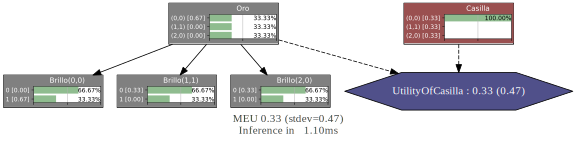

In [27]:
print("Situación I: Análisis del escenario sin evidencia:")
gnb.showInference(model,evs={})

En la situación I, en la cual no tenemos evidencia, cualquiera de las tres casillas representa la misma utilidad esperada. Esto coincide con nuestra intuición, toda vez que el oro puede estar en cualquiera de ellas. 

**Ejercicio 2:**

Analice el escenario en el que no hay brillo en $(0,0)$. ¿Qué casilla tiene mayor utilidad esperada? ¿Es esto intuitivamente cierto?

In [29]:
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence({'Brillo(0,0)':0})
ie.makeInference()
print("Utilidades esperadas de las acciones:")
print(ie.posteriorUtility("Casilla"))

Utilidades esperadas de las acciones:

  Casilla                    |
(0,0)    |(1,1)    |(2,0)    |
---------|---------|---------|
 0.0000  | 0.5000  | 0.5000  |



Era de esperarse que la utilidad fuera igual para las casillas $(1,1)$ y $(2,0)$, pues como no hay pistas adicionales sobre el brillo, sólo puede esperarse que en alguna de las dos este con la misma utilidad (probabilidad)

# Escenarios más complejos  <a class="anchor" id="dependencia">
    
Ya estamos listos para considerar un escenario que incluye tanto los pozos y la briza como el oro y el brillo. Pero haremos esto en dos pasos: primero ambas variables en un escenario pequeño, luego el escenario completo que se requiere para implementar un agente basado en utilidad. 

    
## Oro y pozos
    
El siguiente es el código que genera la red de decisión. Observe la creación de la red bayesiana, del nodo de decisión con las acciones del agente, y el nodo de utilidad con la utilidad que definimos al comienzo del notebook.

Situación I: Análisis del escenario sin evidencia:


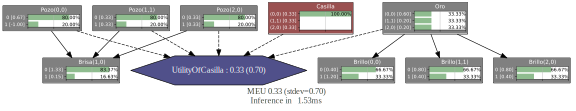

In [30]:
model = gum.InfluenceDiagram()

# Creamos los nodos de probabilidad
pozo0 = gum.LabelizedVariable('Pozo(0,0)','Pozo(0,0)',2)
model.addChanceNode(pozo0)
pozo1 = gum.LabelizedVariable('Pozo(1,1)','Pozo(1,1)',2)
model.addChanceNode(pozo1)
pozo2 = gum.LabelizedVariable('Pozo(2,0)','Pozo(2,0)',2)
model.addChanceNode(pozo2)
brisa = gum.LabelizedVariable('Brisa(1,0)','Brisa(1,0)',2)
model.addChanceNode(brisa)
oro0 = gum.LabelizedVariable('Brillo(0,0)','Brillo(0,0)',2)
model.addChanceNode(oro0)
oro1 = gum.LabelizedVariable('Brillo(1,1)','Brillo(1,1)',2)
model.addChanceNode(oro1)
oro2 = gum.LabelizedVariable('Brillo(2,0)','Brillo(2,0)',2)
model.addChanceNode(oro2)
oro = gum.LabelizedVariable('Oro','Oro',3)
oro.changeLabel(0,'(0,0)')
oro.changeLabel(1,'(1,1)')
oro.changeLabel(2,'(2,0)')
model.addChanceNode(oro)

# Creamos las aristas de la red bayesiana
model.addArc('Pozo(0,0)', 'Brisa(1,0)')
model.addArc('Pozo(1,1)', 'Brisa(1,0)')
model.addArc('Pozo(2,0)', 'Brisa(1,0)')
model.addArc('Oro', 'Brillo(0,0)')
model.addArc('Oro', 'Brillo(1,1)')
model.addArc('Oro', 'Brillo(2,0)')

# Creamos las probabilidades
model.cpt('Pozo(0,0)')[:]=[0.8,0.2]
model.cpt('Pozo(1,1)')[:]=[0.8,0.2]
model.cpt('Pozo(2,0)')[:]=[0.8,0.2]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 1, 'Pozo(1,1)': 1, 'Pozo(2,0)': 1}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 1, 'Pozo(1,1)': 1, 'Pozo(2,0)': 0}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 1, 'Pozo(1,1)': 0, 'Pozo(2,0)': 1}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 1, 'Pozo(1,1)': 0, 'Pozo(2,0)': 0}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 0, 'Pozo(1,1)': 1, 'Pozo(2,0)': 1}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 0, 'Pozo(1,1)': 1, 'Pozo(2,0)': 0}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 0, 'Pozo(1,1)': 0, 'Pozo(2,0)': 1}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 0, 'Pozo(1,1)': 0, 'Pozo(2,0)': 0}] = [1, 0]
model.cpt('Oro').fillWith([1/3,1/3,1/3])
model.cpt('Brillo(0,0)')[{'Oro': 0}] = [0,1]
model.cpt('Brillo(0,0)')[{'Oro': 1}] = [1,0]
model.cpt('Brillo(0,0)')[{'Oro': 2}] = [1,0]
model.cpt('Brillo(1,1)')[{'Oro': 0}] = [1,0]
model.cpt('Brillo(1,1)')[{'Oro': 1}] = [0,1]
model.cpt('Brillo(1,1)')[{'Oro': 2}] = [1,0]
model.cpt('Brillo(2,0)')[{'Oro': 0}] = [1,0]
model.cpt('Brillo(2,0)')[{'Oro': 1}] = [1,0]
model.cpt('Brillo(2,0)')[{'Oro': 2}] = [0,1]

# Creamos el nodo de decisión
casilla = gum.LabelizedVariable('Casilla','Casilla a moverse',3)
casilla.changeLabel(0,'(0,0)')
casilla.changeLabel(1,'(1,1)')
casilla.changeLabel(2,'(2,0)')
model.addDecisionNode(casilla)

# Creamos el nodo de utilidad
ut_casilla = gum.LabelizedVariable('UtilityOfCasilla','Valor casilla',1)
model.addUtilityNode(ut_casilla)

# Creamos las aristas de utilidad
model.addArc('Pozo(0,0)', 'UtilityOfCasilla')
model.addArc('Pozo(1,1)', 'UtilityOfCasilla')
model.addArc('Pozo(2,0)', 'UtilityOfCasilla')
model.addArc('Oro', 'UtilityOfCasilla')
model.addArc('Casilla', 'UtilityOfCasilla')

# Asignamos las utilidades
variables = ['Pozo(0,0)','Pozo(1,1)','Pozo(2,0)','Oro','Casilla']
opciones = product([0,1], [0,1], [0,1], ['(0,0)','(1,1)','(2,0)'], ['(0,0)','(1,1)','(2,0)'])
dicts_variables = [{variables[i]:op[i] for i in range(len(variables))} for op in opciones]

def utilidad(d):
    C = d['Casilla']
    if (d['Pozo'+C] == 0) and (d['Oro'] == C):
        return 1
    elif (d['Pozo'+C] == 0):
        return 0.5
    else:
        return -1

for d in dicts_variables:
    model.utility('UtilityOfCasilla')[d]=utilidad(d)

print("Situación I: Análisis del escenario sin evidencia:")
gnb.showInference(model,evs={})

Situación I: Análisis del escenario sin evidencia:


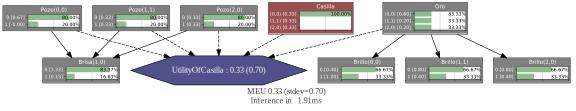

In [23]:
model = gum.InfluenceDiagram()

# Creamos los nodos de probabilidad
pozo0 = gum.LabelizedVariable('Pozo(0,0)','Pozo(0,0)',2)
model.addChanceNode(pozo0)
pozo1 = gum.LabelizedVariable('Pozo(1,1)','Pozo(1,1)',2)
model.addChanceNode(pozo1)
pozo2 = gum.LabelizedVariable('Pozo(2,0)','Pozo(2,0)',2)
model.addChanceNode(pozo2)
brisa = gum.LabelizedVariable('Brisa(1,0)','Brisa(1,0)',2)
model.addChanceNode(brisa)
oro0 = gum.LabelizedVariable('Brillo(0,0)','Brillo(0,0)',2)
model.addChanceNode(oro0)
oro1 = gum.LabelizedVariable('Brillo(1,1)','Brillo(1,1)',2)
model.addChanceNode(oro1)
oro2 = gum.LabelizedVariable('Brillo(2,0)','Brillo(2,0)',2)
model.addChanceNode(oro2)
oro = gum.LabelizedVariable('Oro','Oro',3)
oro.changeLabel(0,'(0,0)')
oro.changeLabel(1,'(1,1)')
oro.changeLabel(2,'(2,0)')
model.addChanceNode(oro)

# Creamos las aristas de la red bayesiana
model.addArc('Pozo(0,0)', 'Brisa(1,0)')
model.addArc('Pozo(1,1)', 'Brisa(1,0)')
model.addArc('Pozo(2,0)', 'Brisa(1,0)')
model.addArc('Oro', 'Brillo(0,0)')
model.addArc('Oro', 'Brillo(1,1)')
model.addArc('Oro', 'Brillo(2,0)')

# Creamos las probabilidades
model.cpt('Pozo(0,0)')[:]=[0.8,0.2]
model.cpt('Pozo(1,1)')[:]=[0.8,0.2]
model.cpt('Pozo(2,0)')[:]=[0.8,0.2]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 1, 'Pozo(1,1)': 1, 'Pozo(2,0)': 1}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 1, 'Pozo(1,1)': 1, 'Pozo(2,0)': 0}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 1, 'Pozo(1,1)': 0, 'Pozo(2,0)': 1}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 1, 'Pozo(1,1)': 0, 'Pozo(2,0)': 0}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 0, 'Pozo(1,1)': 1, 'Pozo(2,0)': 1}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 0, 'Pozo(1,1)': 1, 'Pozo(2,0)': 0}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 0, 'Pozo(1,1)': 0, 'Pozo(2,0)': 1}] = [0, 1]
model.cpt('Brisa(1,0)')[{'Pozo(0,0)': 0, 'Pozo(1,1)': 0, 'Pozo(2,0)': 0}] = [1, 0]
model.cpt('Oro').fillWith([1/3,1/3,1/3])
model.cpt('Brillo(0,0)')[{'Oro': 0}] = [0,1]
model.cpt('Brillo(0,0)')[{'Oro': 1}] = [1,0]
model.cpt('Brillo(0,0)')[{'Oro': 2}] = [1,0]
model.cpt('Brillo(1,1)')[{'Oro': 0}] = [1,0]
model.cpt('Brillo(1,1)')[{'Oro': 1}] = [0,1]
model.cpt('Brillo(1,1)')[{'Oro': 2}] = [1,0]
model.cpt('Brillo(2,0)')[{'Oro': 0}] = [1,0]
model.cpt('Brillo(2,0)')[{'Oro': 1}] = [1,0]
model.cpt('Brillo(2,0)')[{'Oro': 2}] = [0,1]

# Creamos el nodo de decisión
casilla = gum.LabelizedVariable('Casilla','Casilla a moverse',3)
casilla.changeLabel(0,'(0,0)')
casilla.changeLabel(1,'(1,1)')
casilla.changeLabel(2,'(2,0)')
model.addDecisionNode(casilla)

# Creamos el nodo de utilidad
ut_casilla = gum.LabelizedVariable('UtilityOfCasilla','Valor casilla',1)
model.addUtilityNode(ut_casilla)

# Creamos las aristas de utilidad
model.addArc('Pozo(0,0)', 'UtilityOfCasilla')
model.addArc('Pozo(1,1)', 'UtilityOfCasilla')
model.addArc('Pozo(2,0)', 'UtilityOfCasilla')
model.addArc('Oro', 'UtilityOfCasilla')
model.addArc('Casilla', 'UtilityOfCasilla')

# Asignamos las utilidades
variables = ['Pozo(0,0)','Pozo(1,1)','Pozo(2,0)','Oro','Casilla']
opciones = product([0,1], [0,1], [0,1], ['(0,0)','(1,1)','(2,0)'], ['(0,0)','(1,1)','(2,0)'])
dicts_variables = [{variables[i]:op[i] for i in range(len(variables))} for op in opciones]

def utilidad(d):
    C = d['Casilla']
    if (d['Pozo'+C] == 0) and (d['Oro'] == C):
        return 1
    elif (d['Pozo'+C] == 0):
        return 0.5
    else:
        return -1

for d in dicts_variables:
    model.utility('UtilityOfCasilla')[d]=utilidad(d)

print("Situación I: Análisis del escenario sin evidencia:")
gnb.showInference(model,evs={})

Observe que cuando el agente está en la casilla $(1,0)$ y no tiene ninguna información sobre el mundo, todas las tres acciones posibles tienen la misma utilidad. Esto cambia cuando incluimos evidencia. Realice los siguientes ejercicios para analizar distintos esceneraios.

**Ejercicio 3:**

Considere un escenario en el cual no hay brillo en $(0,0)$ ni brisa en $(1,0)$. Este es el escenario de la figura de la derecha al comienzo del notebook. En este escenario, ¿cuál acción tiene mayor utilidad esperada? ¿Es esto intuitivamente cierto?

In [31]:
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence({'Brillo(0,0)':0, 'Brisa(1,0)':0})
ie.makeInference()
print("Utilidades esperadas de las acciones:")
print(ie.posteriorUtility("Casilla"))

Utilidades esperadas de las acciones:

  Casilla                    |
(0,0)    |(1,1)    |(2,0)    |
---------|---------|---------|
 0.5000  | 0.7500  | 0.7500  |



Al saber que no hay brisa en $(1,0)$, quiere decir que todas las casillas adyacentes son seguras, ahora sumado al hecho de que se sabe que en $(0,0)$ NO hay oro, es mejor explorar y moverse a alguna de las seguras adyacentes.

---

**Ejercicio 4:**

Considere un escenario en el cual no hay brillo ni pozo en $(0,0)$, pero hay brisa en $(1,0)$. En este escenario, ¿cuál acción tiene mayor utilidad esperada? ¿Es esto intuitivamente cierto?

In [32]:
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence({'Brillo(0,0)':0, 'Pozo(0,0)':0, 'Brisa(1,0)':1})
ie.makeInference()
print("Utilidades esperadas de las acciones:")
print(ie.posteriorUtility("Casilla"))

Utilidades esperadas de las acciones:

  Casilla                    |
(0,0)    |(1,1)    |(2,0)    |
---------|---------|---------|
 0.5000  | -0.2222 | -0.2222 |



Al saber que no hay pozo en $(0,0)$, pero si hay brisa en $(1,0)$, lo más probable es que alguna de las casillas adyacentes tenga pozo, esto se ve reflejado en la utilidad al obtener utilidad negativa justo en las casillas adyacentes diferentes de $(0,0)$. Por tal motivo, la acción más conservadora y que mantiene al agente con vida es volver a $(0,0)$.

---

## El escenario con brisa y oro completos

Resulta muy ineficiente crear el escenario con todas las variables para brisa, pozo, brillo y oro de todas las rejillas. En efecto, para implementar la función de utilidad requeriríamos una cantidad astronómica de diccionarios (el número exacto es $2^{16}*2^{16}*16*16\approx 7\times 10^{16}$). La solución, la cual resulta bastante buena, como veremos a continuación, es crear una red de decisión para cada casilla. Aún así, necesitamos crear una variable para todos los brillos, pero no para todas las brisas y pozos. Para estas últimas sólo necesitamos considerar casillas adyacentes de manera limitada.

El siguiente es el código para crear la red de decisión para una casilla dada. Tómese unos minutos para analizarlo, así sea por encima.

In [3]:
def crear_red_decision(cas):
    
    model = gum.InfluenceDiagram()
    
    todas_casillas = [(x,y) for x in range(4) for y in range(4)]
    total_casillas = len(todas_casillas)
    casillas = adyacentes(cas)
    num_casillas = len(casillas)

    # Creando variables del oro, brisas y pozos
    oro = gum.LabelizedVariable('Oro','Oro',total_casillas)
    for i, c in enumerate(todas_casillas):
        oro.changeLabel(i,str(c))
        brillo_i = gum.LabelizedVariable('Brillo'+str(c),'Brillo'+str(c),2)
        model.addChanceNode(brillo_i)
        pozo_i = gum.LabelizedVariable('Pozo'+str(c),'Pozo'+str(c),2)
        model.addChanceNode(pozo_i)
        brisa_i = gum.LabelizedVariable('Brisa'+str(c),'Brisa'+str(c),2)
        model.addChanceNode(brisa_i)
    model.addChanceNode(oro)

    # Creando variables de casilla
    casilla = gum.LabelizedVariable('Casilla','Casilla a moverse',num_casillas)
    for i, c in enumerate(casillas):
        casilla.changeLabel(i,str(c))
    model.addDecisionNode(casilla)

    # Creando variable de utilidad
    ut_casilla = gum.LabelizedVariable('UtilityOfCasilla','Valor casilla',1)
    model.addUtilityNode(ut_casilla)

    # Creando aristas del grafo
    for c in todas_casillas:
        model.addArc('Oro', 'Brillo'+str(c))
        for c1 in adyacentes(c):
            model.addArc('Pozo'+str(c), 'Brisa'+str(c1))
    for c in casillas:
        model.addArc('Pozo'+str(c), 'UtilityOfCasilla')
    model.addArc('Oro', 'UtilityOfCasilla')
    model.addArc('Casilla', 'UtilityOfCasilla')
    
    # Creando tablas de probabilidad
    model.cpt('Oro').fillWith([1/total_casillas]*total_casillas)
    for c in todas_casillas:
        brillo = 'Brillo' + str(c)
        for c1 in todas_casillas:
            model.cpt(brillo)[{'Oro': str(c1)}] = oro_a_brillo(c,c1)
    
    pozos = ['Pozo'+str(c) for c in todas_casillas]
    for pozo in pozos:
        model.cpt(pozo)[:]=[0.8,0.2]

    for c in todas_casillas:
        pozos_brisa = ['Pozo'+str(c1) for c1 in adyacentes(c)]
        brisa = 'Brisa' + str(c)
        opciones = list(product(*[[0,1] for p in pozos_brisa]))
        dicts_variables = [{pozos_brisa[i]:op[i] for i in range(len(pozos_brisa))} for op in opciones]
        for d in dicts_variables:
            model.cpt(brisa)[d] = pozos_a_brisa(d)
        
    # Creando la utilidad
    pozos = ['Pozo'+str(c) for c in casillas]
    casillas = [str(c) for c in adyacentes(cas)]
    todas_casillas = [str(c) for c in todas_casillas]
    variables = ['Casilla','Oro'] + pozos
    opciones = list(product(casillas, todas_casillas, *[[0,1] for i in pozos]))
    dicts_variables = [{variables[i]:op[i] for i in range(len(variables))} for op in opciones]
    for d in dicts_variables:
        model.utility('UtilityOfCasilla')[d]=utilidad(d)


    return model

def pozos_a_brisa(d):
    if 1 not in d.values():
        return [1,0]
    else:
        return [0,1]

def oro_a_brillo(c1,c2):
    if c1 == c2:
        return [0,1]
    else:
        return [1,0]
    
def utilidad(d):
    C = d['Casilla']
    if (d['Pozo'+str(C)] == 0) and (d['Oro'] == C):
        return 1
    elif (d['Pozo'+str(C)] == 0):
        return 0
    else:
        return -1

La red que crea esta función es bastante grande. Esto hace que la visualización en el notebook sea problemática, toda vez que las variables se ven muy pequeñas. Resulta mejor guardar la red en una imagen que podamos examinar en cualquier aplicación para visualizar archivos de imágenes. 

Vamos a crear una red para la casilla $(0,0)$ mediante el código de la siguiente celda. Podemos analizar la topología de la red al examinar el archivo `network.png`.

In [42]:
model = crear_red_decision((0,0))
svg = gnb.getInfluenceDiagram(model)
cairosvg.svg2png(bytestring=svg,write_to='network.png',dpi=2000)
#gnb.showInference(model,evs={})

Supongamos que no hay brillo ni brisa en la casilla $(0,0)$. La inferencia nos dice que las dos casillas adyacentes tienen la misma utilidad:

In [43]:
evidencia = {'Brillo(0, 0)':0, 'Brisa(0, 0)':0}
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence(evidencia)
ie.makeInference()
ie.posteriorUtility("Casilla")

(pyAgrum.Potential<double>@0x7f9a063ca098) 
  Casilla          |
(1, 0)   |(0, 1)   |
---------|---------|
 0.0667  | 0.0667  |

Podemos crear la red con la inferencia anterior, y visualizarla al examinar el archivo `inferencia.png`:

In [44]:
svg = gnb.getInference(model,evs={'Brillo(0, 0)':0, 'Brisa(0, 0)':0},targets={})
cairosvg.svg2png(bytestring=svg,write_to='inferencia.png',dpi=2000)

**Ejercicio 5:**

Suponga que el juego inicia y el agente no percibe nada en la casilla de salida. Luego avanza dos casillas hacia la derecha sin percibir nada. Al avanzar una casilla arriba se encuentra con una brisa. Cree una red de decisión para encontrar la acción que maximiza la utilidad esperada de este escenario. ¿Es esta acción intuitivamente aceptable?

*Nota:* Observe cuáles variables crea la función `crear_red_decision`, para evitar errores a la hora de incluir la evidencia.

La respuesta debe ser la siguiente:

<img src="./imagenes/respuesta.png" width="180">

In [46]:
model = crear_red_decision((2,1))
svg = gnb.getInference(model,evs={},targets={})
cairosvg.svg2png(bytestring=svg,write_to='model2_1.png',dpi=2000)

In [53]:
evidencia = {'Brisa(2, 1)':1, 'Pozo(0, 0)':0, 'Pozo(1, 1)':0, 'Pozo(2, 0)': 0, 'Brillo(2, 1)':0, 'Brillo(2, 0)':0, 'Brillo(1, 0)': 0, 'Brillo(0, 0)':0}
svg = gnb.getInference(model,evs=evidencia,targets={})
cairosvg.svg2png(bytestring=svg,write_to='exercise5.png',dpi=2000)

In [52]:
model = crear_red_decision((2,1))
evidencia = {'Brisa(2, 1)':1, 'Pozo(0, 0)':0, 'Pozo(1, 1)':0, 'Pozo(2, 0)': 0, 'Brillo(2, 1)':0, 'Brillo(2, 0)':0, 'Brillo(1, 0)': 0, 'Brillo(0, 0)':0}
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence(evidencia)
ie.makeInference()
ie.posteriorUtility("Casilla")

(pyAgrum.Potential<double>@0x7f9a0762a688) 
  Casilla                              |
(1, 1)   |(3, 1)   |(2, 0)   |(2, 2)   |
---------|---------|---------|---------|
 0.0833  | -0.5185 | 0.0000  | -0.5185 |

---

# Agente basado en la utilidad  <a class="anchor" id="utility-based">
    
Ya tenemos todas las herramientas para crear un programa de agente basado en utilidad. Solo necesitamos dos cosas: una función auxiliar que empaquete la toma de decisiones y, luego, adaptar el programa de agente que ya teníamos para incluir esta nueva forma de crear planes de acciones.
    
Comenzamos con la función auxiliar de toma de decisiones:

In [3]:
def tomar_decision(casilla, evs, tabla=False, imagen=False):
    # Creamos la red de decision para la casilla dada
    model = crear_red_decision(casilla)
    # Guardamos solo la evidencia que cae en las variables de la red de decisión
    evid = {v:evs[v] for v in evs.keys() if v in model.names()}
    # Hacemos la inferencia
    ie = gum.InfluenceDiagramInference(model)
    ie.setEvidence(evid)
    ie.makeInference()
    casillas = [c for c in adyacentes(casilla)]
    valores = ie.posteriorUtility("Casilla")
    if tabla:
        print(valores)
    # Escogemos la acción con mayor utilidad esperada
    decision = maximo_aleatorio(valores.tolist())
    if imagen:
        svg = gnb.getInference(model,evs=evid,targets={})
        cairosvg.svg2png(bytestring=svg,write_to='inferencia.png',dpi=2000)
    return casillas[decision]


Comprobamos su funcionamiento con una decisión sencilla:

In [55]:
tomar_decision((0,0), {'Brisa(0, 0)': 0}, tabla=True, imagen=False)


  Casilla          |
(1, 0)   |(0, 1)   |
---------|---------|
 0.0625  | 0.0625  |



(0, 1)

Ahora adaptamos el programa de angente que teníamos para que la toma de decisiones se haga maximizando la utilidad esperada. Este programa considera las siguientes reglas:

* Si ve el oro, lo toma y traza una ruta hasta la salida.
* Si está en la salida y ya tiene el oro, sale.
* En otro caso, escoge la acción que maximiza la utilidad esperada dada una lista de evidencias.

In [4]:
def programa_utility_based(self, evidencia, casillas_seguras):
       
    # Encuentra la casilla actual
    casilla_actual = self.mundo.heroe
    acciones = []
    percepcion = self.percibir()
    
    # Si ve el oro, lo toma y planea un camino hasta la salida
    if 'brillo' in percepcion:
#        print("¡Veo el oro!")
        acciones = ['agarrar']
        R = Rejilla(casilla_actual, (0,0), casillas_seguras)
        camino = best_first_search(R)
        camino = [casilla_actual] + solucion(camino)
        acciones += acciones_camino(camino, self.mundo.direccion)
        
    # Si está en la salida y tiene el oro, salir
    elif self.mundo.heroe == (0,0) and self.mundo.oro_tomado:
        acciones.append('salir')
    else:
        # Escoje la casilla de mayor utilidad
        casilla_ir = tomar_decision(casilla_actual, evidencia)
        camino = [casilla_actual, casilla_ir]
        acciones += acciones_camino(camino, self.mundo.direccion)

    return acciones

setattr(Agente, "programa", programa_utility_based)

Observe que como argumento de este programa estamos usando un diccionario de evidencia y una lista de casillas seguras. Esta información se va guardando en cada iteración del agente. Veámos un ejemplo de cómo funciona este programa en un caso concreto:

NameError: name 'crear_red_decision' is not defined

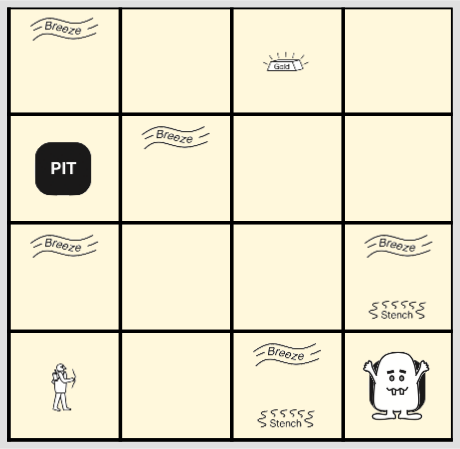

In [5]:
from time import sleep
from IPython.display import clear_output

W = Wumpus(wumpus=(3,0), oro=(2,3), pozos=[(3,0), (0,2)])
W.pintar_todo()
agente = Agente(W)
max_turnos = 70
acciones = []
casillas_seguras = []
evidencia = {'Pozo(0, 0)':0}
for t in range(max_turnos):
    sleep(.25)
    casilla_actual = agente.mundo.heroe
    if casilla_actual not in casillas_seguras:
        casillas_seguras.append(casilla_actual)
    for casilla in casillas_seguras:
        evidencia['Pozo'+str(casilla)] = 0
    percepcion = agente.percibir()
    if 'brillo' not in percepcion:
        evidencia['Brillo'+str(casilla_actual)] = 0
    if 'brisa' in percepcion:
        evidencia['Brisa'+str(casilla_actual)] = 1
    else:
        evidencia['Brisa'+str(casilla_actual)] = 0        
    if len(acciones) > 0:
        accion = acciones.pop(0)
    else:
        acciones = agente.programa(evidencia, casillas_seguras)
        accion = acciones.pop(0)
    W.transicion(accion)
    if not W.juego_activo:
        clear_output(wait=True)
        print(W.mensaje)
        break
    clear_output(wait=True)
    W.pintar_todo()
    plt.show()

Al héroe le va bastante bien buscando el oro en este escenario y, una vez encontrado, saliendo de la caverna de manera segura.

Ahora corra el siguiente escenario:

¡Juego terminado!
El héroe ha sido devorado por el Wumpus
Puntaje: -1003


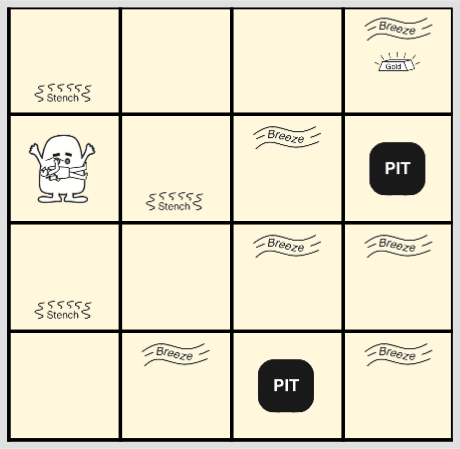

In [11]:
from time import sleep
from IPython.display import clear_output

W = Wumpus(wumpus=(0,2), oro=(3,3), pozos=[(2,0), (3,2)])
W.pintar_todo()
agente = Agente(W)
max_turnos = 70
acciones = []
casillas_seguras = []
evidencia = {'Pozo(0, 0)':0}
for t in range(max_turnos):
    sleep(.25)
    clear_output(wait=True)
    casilla_actual = agente.mundo.heroe
    if casilla_actual not in casillas_seguras:
        casillas_seguras.append(casilla_actual)
    percepcion = agente.percibir()
    if 'brillo' not in percepcion:
        evidencia['Brillo'+str(casilla_actual)] = 0
    if 'brisa' in percepcion:
        evidencia['Brisa'+str(casilla_actual)] = 1
    else:
        evidencia['Brisa'+str(casilla_actual)] = 0        
    if len(acciones) > 0:
        accion = acciones.pop(0)
    else:
        acciones = agente.programa(evidencia, casillas_seguras)
        accion = acciones.pop(0)
    W.transicion(accion)
    if not W.juego_activo:
        clear_output(wait=True)
        print(W.mensaje)
        break
    W.pintar_todo()
    plt.show()

**Ejercicio 6:**

Modifique la función `crear_red_decision` para incluir las variables de hedor y Wumpus, para que el héroe sea capaz de superar el escenario anterior.

In [6]:
def crear_red_decision(cas):
    
    model = gum.InfluenceDiagram()
    
    todas_casillas = [(x,y) for x in range(4) for y in range(4)]
    total_casillas = len(todas_casillas)
    casillas = adyacentes(cas)
    num_casillas = len(casillas)

    # Creando variables del oro, brisas, pozos, wumpus y hedores
    oro = gum.LabelizedVariable('Oro','Oro',total_casillas)
    for i, c in enumerate(todas_casillas):
        oro.changeLabel(i,str(c))
        brillo_i = gum.LabelizedVariable('Brillo'+str(c),'Brillo'+str(c),2)
        model.addChanceNode(brillo_i)
        pozo_i = gum.LabelizedVariable('Pozo'+str(c),'Pozo'+str(c),2)
        model.addChanceNode(pozo_i)
        brisa_i = gum.LabelizedVariable('Brisa'+str(c),'Brisa'+str(c),2)
        model.addChanceNode(brisa_i)
        wumpus_i = gum.LabelizedVariable('Wumpus'+str(c),'Wumpus'+str(c),2)
        model.addChanceNode(wumpus_i)
        hedor_i = gum.LabelizedVariable('Hedor'+str(c),'Hedor'+str(c),2)
        model.addChanceNode(hedor_i)
    model.addChanceNode(oro)

    # Creando variables de casilla
    casilla = gum.LabelizedVariable('Casilla','Casilla a moverse',num_casillas)
    for i, c in enumerate(casillas):
        casilla.changeLabel(i,str(c))
    model.addDecisionNode(casilla)

    # Creando variable de utilidad
    ut_casilla = gum.LabelizedVariable('UtilityOfCasilla','Valor casilla',1)
    model.addUtilityNode(ut_casilla)

    # Creando aristas del grafo
    for c in todas_casillas:
        model.addArc('Oro', 'Brillo'+str(c))
        for c1 in adyacentes(c):
            model.addArc('Pozo'+str(c), 'Brisa'+str(c1))
            model.addArc('Wumpus'+str(c), 'Hedor'+str(c1))
    for c in casillas:
        model.addArc('Pozo'+str(c), 'UtilityOfCasilla')
        model.addArc('Wumpus'+str(c), 'UtilityOfCasilla')
    model.addArc('Oro', 'UtilityOfCasilla')
    model.addArc('Casilla', 'UtilityOfCasilla')
    
    # Creando tablas de probabilidad
    model.cpt('Oro').fillWith([1/total_casillas]*total_casillas)
    for c in todas_casillas:
        brillo = 'Brillo' + str(c)
        for c1 in todas_casillas:
            model.cpt(brillo)[{'Oro': str(c1)}] = oro_a_brillo(c,c1)
    
    pozos = ['Pozo'+str(c) for c in todas_casillas]
    for pozo in pozos:
        model.cpt(pozo)[:]=[0.8,0.2]
        
    wumpus = ['Wumpus'+str(c) for c in todas_casillas]
    for wump in wumpus:
        model.cpt(wump)[:]=[0.9,0.1]

    for c in todas_casillas:
        pozos_brisa = ['Pozo'+str(c1) for c1 in adyacentes(c)]
        brisa = 'Brisa' + str(c)
        wumpus_hedor = ['Wumpus'+str(c1) for c1 in adyacentes(c)]
        hedor = 'Hedor' + str(c)
        
        opciones = list(product(*[[0,1] for p in pozos_brisa]))
        dicts_variables = [{pozos_brisa[i]:op[i] for i in range(len(pozos_brisa))} for op in opciones]
        for d in dicts_variables:
            model.cpt(brisa)[d] = pozos_a_brisa(d)
        
        opciones = list(product(*[[0,1] for p in wumpus_hedor]))
        dicts_variables = [{wumpus_hedor[i]:op[i] for i in range(len(wumpus_hedor))} for op in opciones]
        for d in dicts_variables:
            model.cpt(hedor)[d] = wumpus_a_hedor(d)
        
        
    # Creando la utilidad
    pozos = ['Pozo'+str(c) for c in casillas]
    wumpus = ['Wumpus'+str(c) for c in casillas]
    casillas = [str(c) for c in adyacentes(cas)]
    todas_casillas = [str(c) for c in todas_casillas]
    variables = ['Casilla','Oro'] + pozos + wumpus
    opciones = list(product(casillas, todas_casillas, *[[0,1] for i in pozos + wumpus]))
    dicts_variables = [{variables[i]:op[i] for i in range(len(variables))} for op in opciones]
    for d in dicts_variables:
        model.utility('UtilityOfCasilla')[d]=utilidad(d)
    
    

    return model

def pozos_a_brisa(d):
    if 1 not in d.values():
        return [1,0]
    else:
        return [0,1]
    
def wumpus_a_hedor(d):
    if 1 not in d.values():
        return [1,0]
    else:
        return [0,1]

def oro_a_brillo(c1,c2):
    if c1 == c2:
        return [0,1]
    else:
        return [1,0]
    
def utilidad(d):
    C = d['Casilla']
    if (d['Wumpus'+str(C)] == 0) and (d['Pozo'+str(C)] == 0) and (d['Oro'] == C):
        return 2
    elif (d['Wumpus'+str(C)] == 0) and (d['Pozo'+str(C)] == 0):
        return 0
    elif (d['Wumpus'+str(C)] == 1) and (d['Pozo'+str(C)] == 0):
        return -1
    elif (d['Wumpus'+str(C)] == 0) and (d['Pozo'+str(C)] == 1):
        return -3
    else:
        return -5

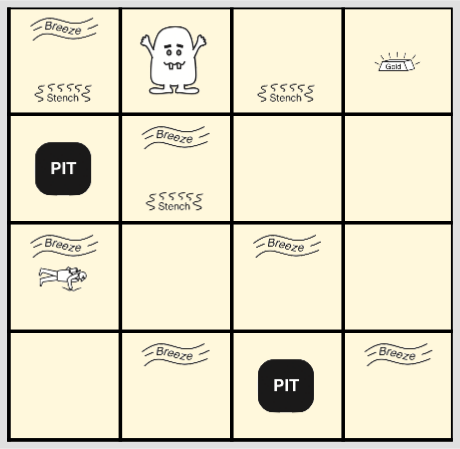

In [37]:
#W = Wumpus(wumpus=(0,3), oro=(3,3), pozos=[(3,1), (2,2)])
#W = Wumpus(wumpus=(1,3), oro=(3,3), pozos=[(2,1), (2,2)])
#W = Wumpus(wumpus=(0,2), oro=(3,3), pozos=[(2,0), (3,2)])
#W = Wumpus(wumpus=(1,3), oro=(3,3), pozos=[(2,1), (0,2)])
#W = Wumpus(wumpus=(1,3), oro=(3,3), pozos=[(1,2), (3,0)])
#W = Wumpus(wumpus=(1,3), oro=(3,3), pozos=[(1,1), (2,2)])
W = Wumpus(wumpus=(1,3), oro=(3,3), pozos=[(2,0), (0,2)])

pozos = 0
wumpus = 0
todas_casillas = [(x,y) for x in range(4) for y in range(4)]
W.pintar_todo()
agente = Agente(W)
max_turnos = 70
acciones = []
casillas_seguras = []
evidencia = {'Pozo(0, 0)':0, 'Wumpus(0, 0)':0}
for t in range(max_turnos):
    sleep(.25)
    casilla_actual = agente.mundo.heroe
    if casilla_actual not in casillas_seguras:
        casillas_seguras.append(casilla_actual)
    for casilla in casillas_seguras:
        evidencia['Pozo'+str(casilla)] = 0
        evidencia['Wumpus'+str(casilla)] = 0
    percepcion = agente.percibir()
    if 'brillo' not in percepcion:
        evidencia['Brillo'+str(casilla_actual)] = 0
    if 'brisa' in percepcion:
        evidencia['Brisa'+str(casilla_actual)] = 1
        if pozos < 2:
            model = crear_red_decision(casilla_actual)
            ie = gum.InfluenceDiagramInference(model)
            ie.setEvidence(evidencia)
            ie.makeInference()
            for casilla in adyacentes(casilla_actual):
                if "Pozo"+str(casilla) not in evidencia.keys():
                    if ie.posterior("Pozo"+str(casilla))[1]>0.95:
                        evidencia["Pozo"+str(casilla)] = 1
                        pozos += 1
        else:
            for casilla in todas_casillas:
                if "Pozo"+str(casilla) not in evidencia.keys():
                    evidencia["Pozo"+str(casilla)] = 0
    else:
        evidencia['Brisa'+str(casilla_actual)] = 0
        for casilla in adyacentes(casilla_actual):
            evidencia['Pozo'+str(casilla)] = 0
    if 'hedor' in percepcion:
        evidencia['Hedor'+str(casilla_actual)] = 1
        if wumpus < 1:
            model = crear_red_decision(casilla_actual)
            ie = gum.InfluenceDiagramInference(model)
            ie.setEvidence(evidencia)
            ie.makeInference()
            for casilla in adyacentes(casilla_actual):
                if "Wumpus"+str(casilla) not in evidencia.keys():
                    if ie.posterior("Wumpus"+str(casilla))[1]>0.95:
                        x_wumpus, y_wumpus = casilla
                        x_heroe, y_heroe = casilla_actual
                        if ((x_heroe < x_wumpus) and (y_heroe == y_wumpus)):
                            matar = voltear(W.direccion, 'este') + ['disparar']
                        elif ((x_heroe > x_wumpus) and (y_heroe == y_wumpus)):
                            matar = voltear(W.direccion, 'oeste') + ['disparar']
                        elif ((y_heroe < y_wumpus) and (x_heroe == x_wumpus)):
                            matar = voltear(W.direccion, 'norte') + ['disparar']
                        else:
                            matar = voltear(W.direccion, 'sur') + ['disparar']
                        for i in matar:
                            W.transicion(i)
                            clear_output(wait=True)
                            W.pintar_todo()
                            plt.show()
                        if W.grito:
                            for i in evidencia.keys():
                                if "Hedor" in i:
                                    evidencia[i]=0
    else:
        evidencia['Hedor'+str(casilla_actual)] = 0
        for casilla in adyacentes(casilla_actual):
            evidencia['Wumpus'+str(casilla)] = 0
    if len(acciones) > 0:
        accion = acciones.pop(0)
    else:
        acciones = agente.programa(evidencia, casillas_seguras)
        accion = acciones.pop(0)
    W.transicion(accion)
    if not W.juego_activo:
        clear_output(wait=True)
        print(W.mensaje)
        break
    clear_output(wait=True)
    W.pintar_todo()
    plt.show()

In [38]:
model = crear_red_decision((1,0))
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence(evidencia)
ie.makeInference()
ie.posterior("Pozo(2, 0)")

(pyAgrum.Potential<double>@0x7fbbca7b6e30) 
  Pozo(2, 0)       |
0        |1        |
---------|---------|
 0.9846  | 0.0154  |

In [32]:
model = crear_red_decision((1,1))
ie = gum.InfluenceDiagramInference(model)
ie.eraseAllEvidence()
ie.setEvidence(evidencia)
ie.makeInference()
ie.posteriorUtility("Casilla")

(pyAgrum.Potential<double>@0x7fbbcb8ccc18) 
  Casilla                              |
(0, 1)   |(2, 1)   |(1, 0)   |(1, 2)   |
---------|---------|---------|---------|
 0.0000  | -3.0000 | 0.0000  | -1.5778 |

In [39]:
evidencia#["Pozo(2, 0)"]
#W.juego_activo, W.oro_tomado
#W.puntaje

{'Pozo(0, 0)': 0,
 'Wumpus(0, 0)': 0,
 'Brillo(0, 0)': 0,
 'Brisa(0, 0)': 0,
 'Pozo(1, 0)': 0,
 'Pozo(0, 1)': 0,
 'Hedor(0, 0)': 0,
 'Wumpus(1, 0)': 0,
 'Wumpus(0, 1)': 0,
 'Brillo(0, 1)': 0,
 'Brisa(0, 1)': 1,
 'Hedor(0, 1)': 0,
 'Wumpus(1, 1)': 0,
 'Wumpus(0, 2)': 0,
 'Brillo(1, 0)': 0,
 'Brisa(1, 0)': 1,
 'Pozo(1, 1)': 1,
 'Hedor(1, 0)': 0,
 'Wumpus(2, 0)': 0}

In [74]:
W.wumpus_vivo

False

In [86]:
del evidencia["Wumpus(2, 2)"]
#evidencia["Pozo(2, 2)"]=1

Supongamos que no hay brillo ni brisa en la casilla $(0,0)$. La inferencia nos dice que las dos casillas adyacentes tienen la misma utilidad:

In [8]:
evidencia = {'Brillo(0, 0)':0, 'Brisa(0, 0)':0, 'Hedor(0, 0)':0}
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence(evidencia)
ie.makeInference()
ie.posteriorUtility("Casilla")

/Users/jdrojasga/miniconda3/lib/python3.9/site-packages/pyAgrum/deprecated.py:19: UserWarning: 
  ** pyAgrum.InfluenceDiagramInference is deprecated in pyAgrum>0.18.2.
  ** A pyAgrum.ShaferShenoyLIMIDInference has been created.
  
  warnings.warn("""


(pyAgrum.Potential<double>@0x7fe3dd2c4e38) 
  Casilla          |
(1, 0)   |(0, 1)   |
---------|---------|
 0.1333  | 0.1333  |

In [10]:
evidencia

{'Pozo(0, 0)': 0,
 'Wumpus(0, 0)': 0,
 'Brillo(0, 0)': 0,
 'Brisa(0, 0)': 0,
 'Pozo(1, 0)': 0,
 'Pozo(0, 1)': 0,
 'Hedor(0, 0)': 0,
 'Wumpus(1, 0)': 0,
 'Wumpus(0, 1)': 0,
 'Brillo(1, 0)': 0,
 'Brisa(1, 0)': 1,
 'Hedor(1, 0)': 0,
 'Wumpus(2, 0)': 0,
 'Wumpus(1, 1)': 0,
 'Brillo(0, 1)': 0,
 'Brisa(0, 1)': 0,
 'Pozo(1, 1)': 0,
 'Pozo(0, 2)': 0,
 'Hedor(0, 1)': 1,
 'Brillo(1, 1)': 0,
 'Brisa(1, 1)': 0,
 'Pozo(2, 1)': 0,
 'Pozo(1, 2)': 0,
 'Hedor(1, 1)': 0,
 'Wumpus(2, 1)': 0,
 'Wumpus(1, 2)': 0,
 'Brillo(1, 2)': 0,
 'Brisa(1, 2)': 0,
 'Pozo(2, 2)': 0,
 'Pozo(1, 3)': 0,
 'Hedor(1, 2)': 1,
 'Wumpus(1, 3)': 0,
 'Brillo(1, 3)': 0,
 'Brisa(1, 3)': 0,
 'Pozo(0, 3)': 0,
 'Pozo(2, 3)': 0,
 'Hedor(1, 3)': 0,
 'Wumpus(0, 3)': 0,
 'Wumpus(2, 3)': 0,
 'Brillo(2, 3)': 0,
 'Brisa(2, 3)': 0,
 'Pozo(3, 3)': 0,
 'Hedor(2, 3)': 0,
 'Wumpus(3, 3)': 0,
 'Wumpus(2, 2)': 0,
 'Brillo(2, 2)': 0,
 'Brisa(2, 2)': 1,
 'Hedor(2, 2)': 0,
 'Wumpus(3, 2)': 0,
 'Brillo(2, 1)': 0,
 'Brisa(2, 1)': 1,
 'Hedor(2, 1)': 0,
 '

In [13]:
model = crear_red_decision((1,2))
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence(evidencia)
ie.makeInference()
ie.posteriorUtility("Wumpus(0, 2)")

(pyAgrum.Potential<double>@0x7fe3dc2e5728) 
  Wumpus(0, 2)     |
0        |1        |
---------|---------|
 0.0000  | 0.0256  |

In [94]:
model = crear_red_decision((2,2))
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence(evidencia)
ie.makeInference()
ie.posteriorUtility("Casilla")

(pyAgrum.Potential<double>@0x7f9a07692068) 
  Casilla                              |
(1, 2)   |(3, 2)   |(2, 1)   |(2, 3)   |
---------|---------|---------|---------|
 0.0000  | -2.0000 | 0.0000  | 0.0000  |

In [17]:
evidencia

{'Pozo(0, 0)': 0,
 'Wumpus(0, 0)': 0,
 'Brillo(0, 0)': 0,
 'Brisa(0, 0)': 0,
 'Pozo(1, 0)': 0,
 'Pozo(0, 1)': 0,
 'Hedor(0, 0)': 0,
 'Wumpus(1, 0)': 0,
 'Wumpus(0, 1)': 0,
 'Brillo(0, 1)': 0,
 'Brisa(0, 1)': 1,
 'Hedor(0, 1)': 0,
 'Wumpus(1, 1)': 0,
 'Wumpus(0, 2)': 0,
 'Brillo(1, 0)': 0,
 'Brisa(1, 0)': 0,
 'Pozo(2, 0)': 0,
 'Pozo(1, 1)': 0,
 'Hedor(1, 0)': 0,
 'Wumpus(2, 0)': 0,
 'Brillo(2, 0)': 0,
 'Brisa(2, 0)': 1,
 'Hedor(2, 0)': 0,
 'Wumpus(3, 0)': 0,
 'Wumpus(2, 1)': 0,
 'Brillo(1, 1)': 0,
 'Brisa(1, 1)': 1,
 'Hedor(1, 1)': 0,
 'Wumpus(1, 2)': 0}

In [20]:
model = crear_red_decision((1,1))
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence(evidencia)
ie.makeInference()
ie.posteriorUtility("Pozo(2, 1)")

(pyAgrum.Potential<double>@0x7fe3dd47df08) 
  Pozo(2, 1)       |
0        |1        |
---------|---------|
 0.0410  | 0.0410  |

In [100]:
model = crear_red_decision((1,1))
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence(evidencia)
ie.makeInference()
ie.posteriorUtility("Casilla")

(pyAgrum.Potential<double>@0x7f9a063969c8) 
  Casilla                              |
(0, 1)   |(2, 1)   |(1, 0)   |(1, 2)   |
---------|---------|---------|---------|
 0.0000  | -1.6991 | 0.0000  | -0.4953 |

In [22]:
evidencia

{'Pozo(0, 0)': 0,
 'Wumpus(0, 0)': 0,
 'Brillo(0, 0)': 0,
 'Brisa(0, 0)': 0,
 'Pozo(1, 0)': 0,
 'Pozo(0, 1)': 0,
 'Hedor(0, 0)': 0,
 'Wumpus(1, 0)': 0,
 'Wumpus(0, 1)': 0,
 'Brillo(0, 1)': 0,
 'Brisa(0, 1)': 0,
 'Pozo(1, 1)': 0,
 'Pozo(0, 2)': 0,
 'Hedor(0, 1)': 0,
 'Wumpus(1, 1)': 0,
 'Wumpus(0, 2)': 0,
 'Brillo(1, 1)': 0,
 'Brisa(1, 1)': 1,
 'Hedor(1, 1)': 0,
 'Wumpus(2, 1)': 0,
 'Wumpus(1, 2)': 0,
 'Brillo(1, 0)': 0,
 'Brisa(1, 0)': 0,
 'Pozo(2, 0)': 0,
 'Hedor(1, 0)': 0,
 'Wumpus(2, 0)': 0,
 'Brillo(2, 0)': 0,
 'Brisa(2, 0)': 1,
 'Hedor(2, 0)': 0,
 'Wumpus(3, 0)': 0,
 'Brillo(0, 2)': 0,
 'Brisa(0, 2)': 1,
 'Hedor(0, 2)': 0,
 'Wumpus(0, 3)': 0}

---

En este notebook usted aprendió:

* Asociar las acciones racionales con la maximización de la utilidad esperada.
* Implementar redes de decisión mediante el paquete `pyAgrum`.
* Implementar un programa de agente basado en la utilidad.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aac42c09-c37e-4224-994e-665d09602642' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>